# Setup Enviorment

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from MyAnalysisApi import setup_env

# Setup Enviorment
setup_env()



# Load Data

In [2]:
df_train = pd.read_csv( "dataset/train/train.csv")
df_test = pd.read_csv(  "dataset/test/test.csv")
df_stores = pd.read_csv(  "dataset/features/stores.csv")
df_sampleSub = pd.read_csv( "dataset/features/sampleSubmission.csv")
df_features = pd.read_csv("dataset/features/features_cleaned.csv")

# Set commond used function
## this section can be transformed in an Analysis API

In [3]:
def plot_density_plot(df, column, x_lower, x_upper):
    ax= plt.figure(figsize=(20,20))
    ax.set_facecolor('white')
    
    #plolt density function
    df[column].plot.density()
    plt.xlim([x_lower, x_upper])
    plt.title("Distribution Analysis Weekly_Sales")
    plt.xlabel("Weekly_Sales")
    plt.ylabel("Probability Density Function")
    return ax

# Taking out Outilers from train set

In [4]:
df_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


So we have  3 categorical variables and one pure numerical that is the variable we are going to try to predict "Weekly_Sales"

So firstly we are going to analyse weekle sales and after that the categorical variables.

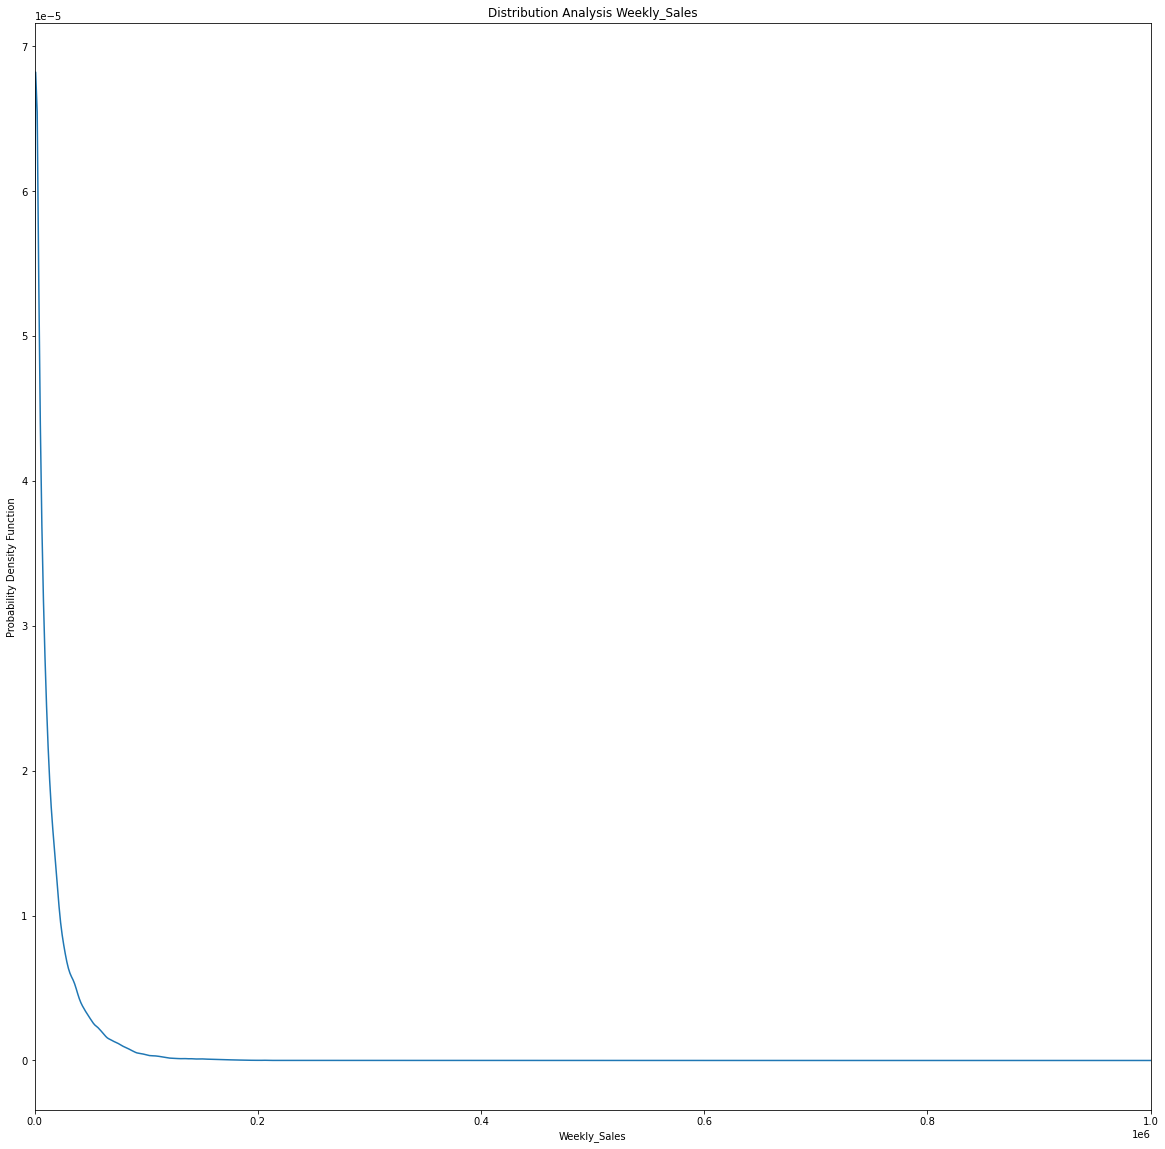

In [5]:

ax = plot_density_plot(df_train, "Weekly_Sales", 0, 1e6)
ax.savefig("assets/outliers_analysis/df_train_densityplot.png")



As seen above, something completely expected, the numerical variables are in different scale, let's analyse them individually.

Text(0.5, 1.0, 'Weekly_Sales distribution BoxPlot')

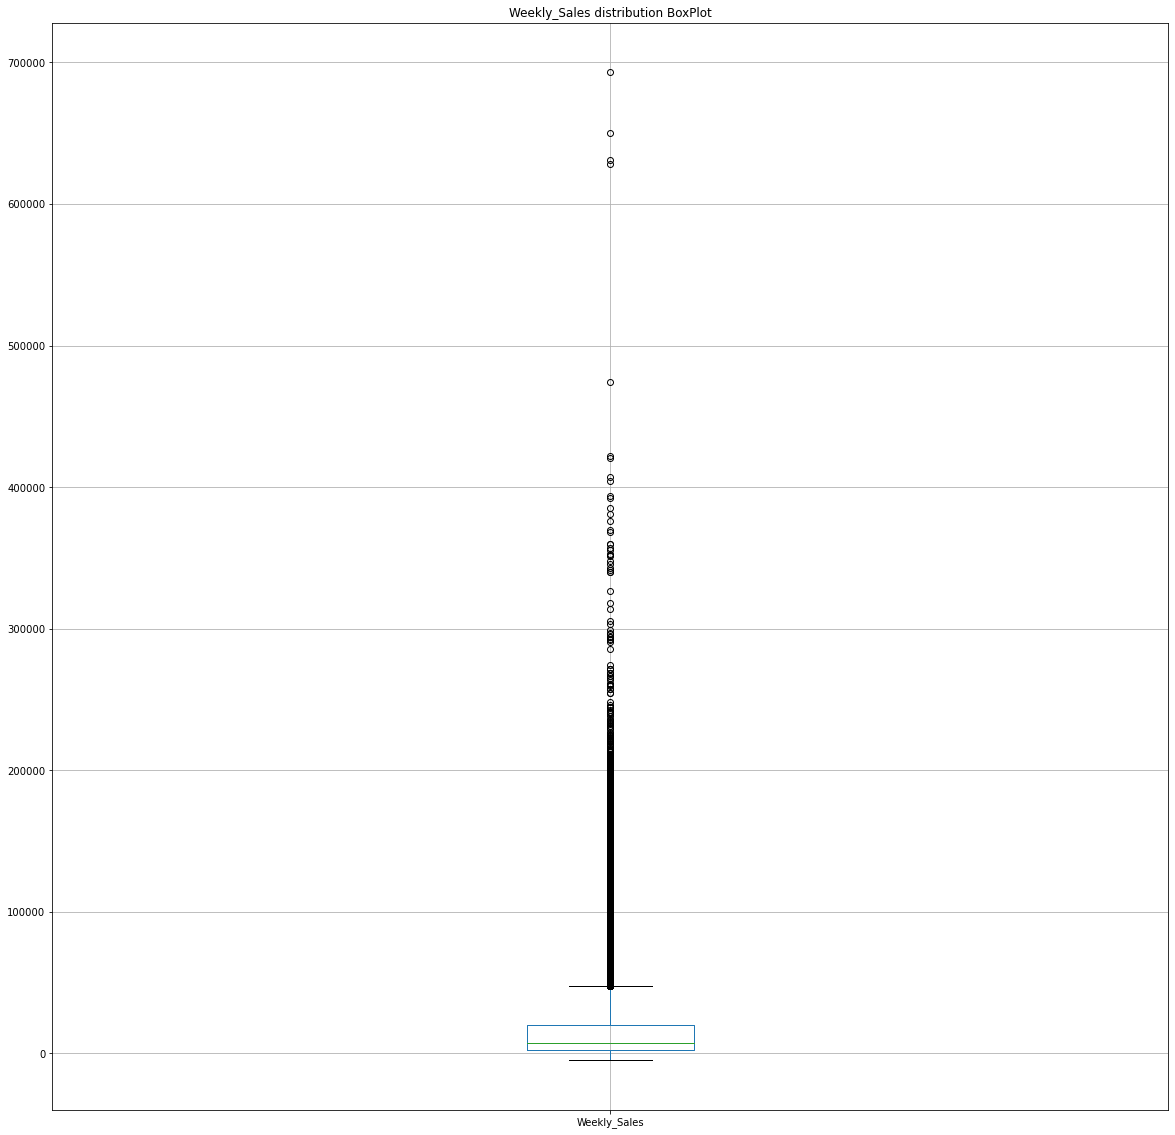

In [6]:
fig = plt.figure(figsize=(20,20))
fig.set_facecolor('white')


df_train.boxplot(column='Weekly_Sales')
plt.title("Weekly_Sales distribution BoxPlot")


Text(0.5, 1.0, 'Weekly_Sales distribution')

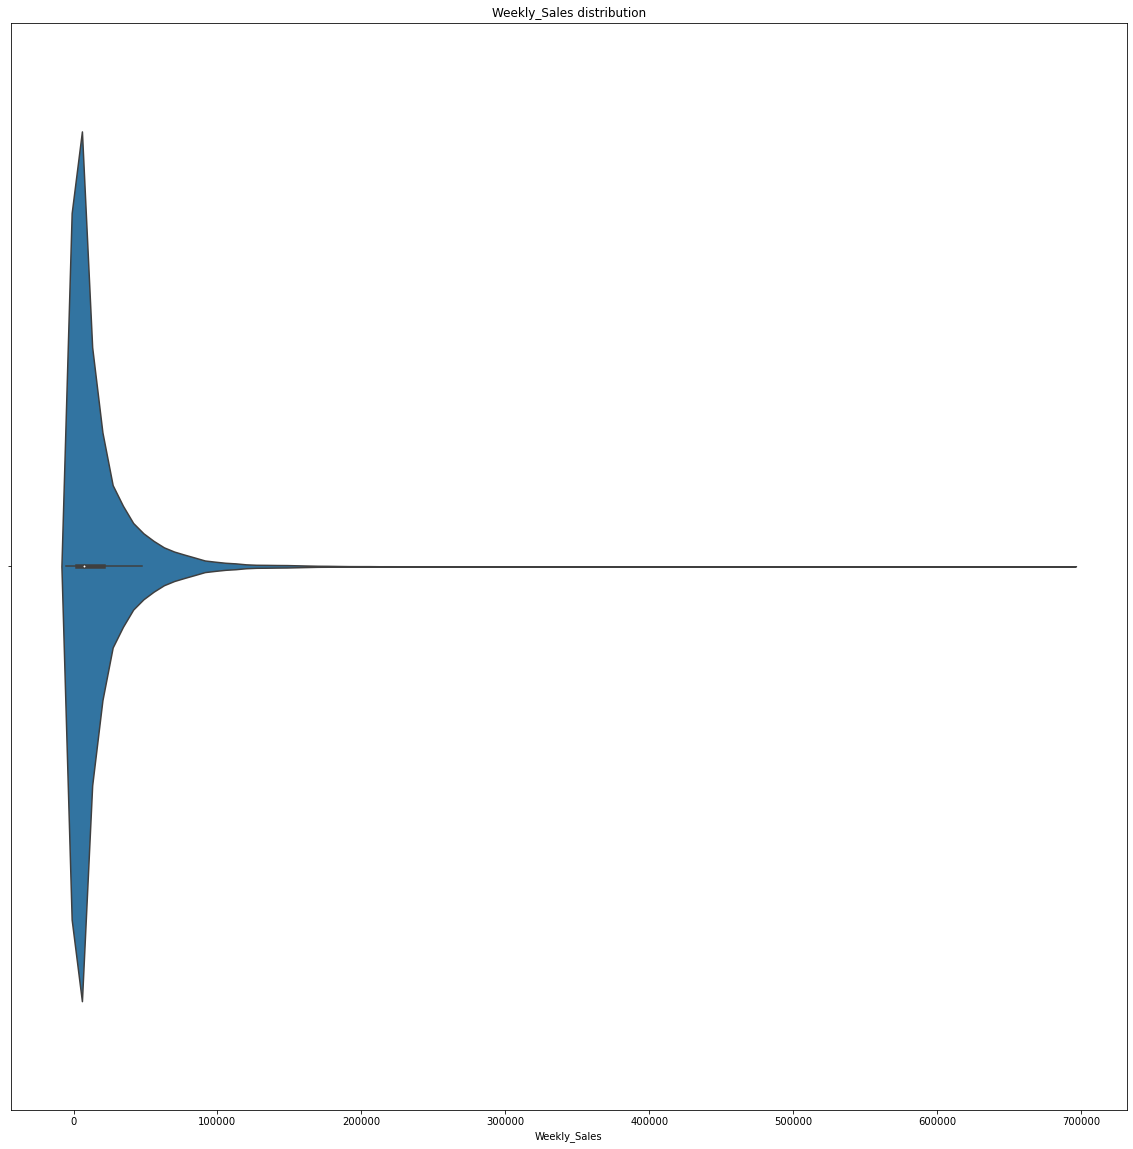

In [7]:
fig = plt.figure(figsize=(20,20))
fig.set_facecolor('white')


sns.violinplot(x=df_train["Weekly_Sales"])
plt.title("Weekly_Sales distribution")

 A little bit strange , but make some sense. In some, season, mainly on the final year the reatil increases because people has more money in this periods and there is some celebrate dates like christmas and new year eve. Other celebrating days can influence on the otliers. Let's take a look when it happens.

In [8]:


df_train[df_train["Weekly_Sales"] > THESHOLD_SALES_VALUE].to_csv("assets/outliers_analysis/top_retail.csv")

In [9]:
df_train[["Date", "Weekly_Sales"]][df_train["Weekly_Sales"] > THESHOLD_SALES_VALUE]



,Date,Weekly_Sales
7741,2011-11-25,203670.47
11148,2010-12-24,264837.42
11200,2011-12-23,214118.51
17896,2010-11-26,285353.53
17900,2010-12-24,223396.79
...,...,...
368375,2010-11-26,339700.62
368427,2011-11-25,351553.98
388475,2010-11-26,290809.17
388527,2011-11-25,271392.45


Here it is possible to observe that Weekly_sales upper than 200.000 is insignificant in terms of the entire dataset, just 163 instances of more than 400,000.
So we get rid of these registers.

In [10]:
# This value may be adjusted to eliminate more outliers

df_train_cleaned = df_train[df_train["Weekly_Sales"] < THESHOLD_SALES_VALUE]



Text(0.5, 1.0, 'Weekly_Sales distribution')

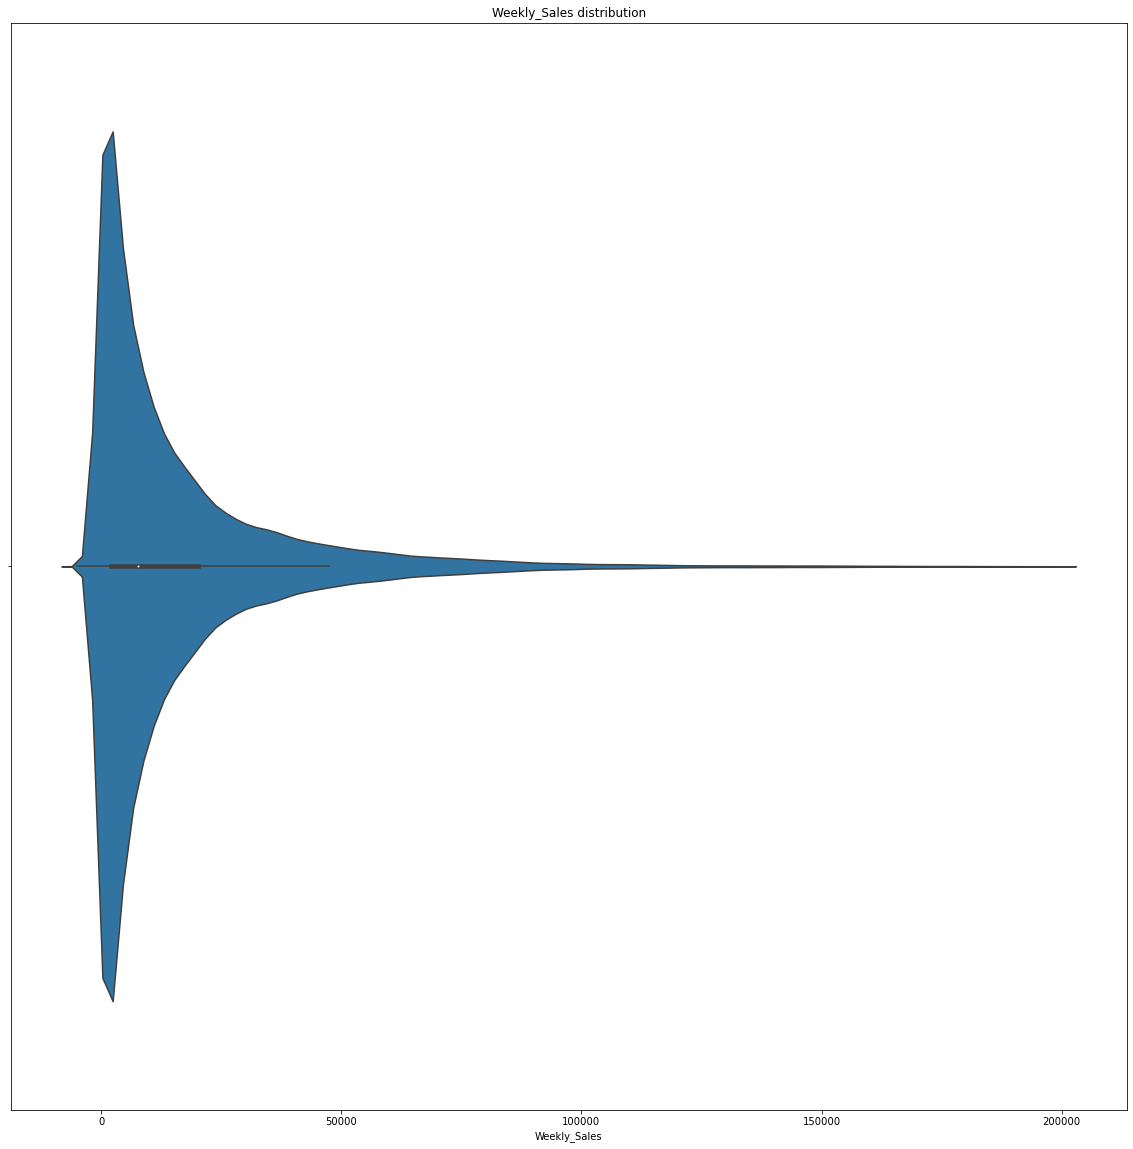

In [11]:
fig = plt.figure(figsize=(20,20))
fig.set_facecolor('white')


sns.violinplot(x=df_train_cleaned["Weekly_Sales"])
plt.title("Weekly_Sales distribution")

Now let's analyse the categorical variables

Text(0.5, 1.0, 'Count Holiday and normal days')

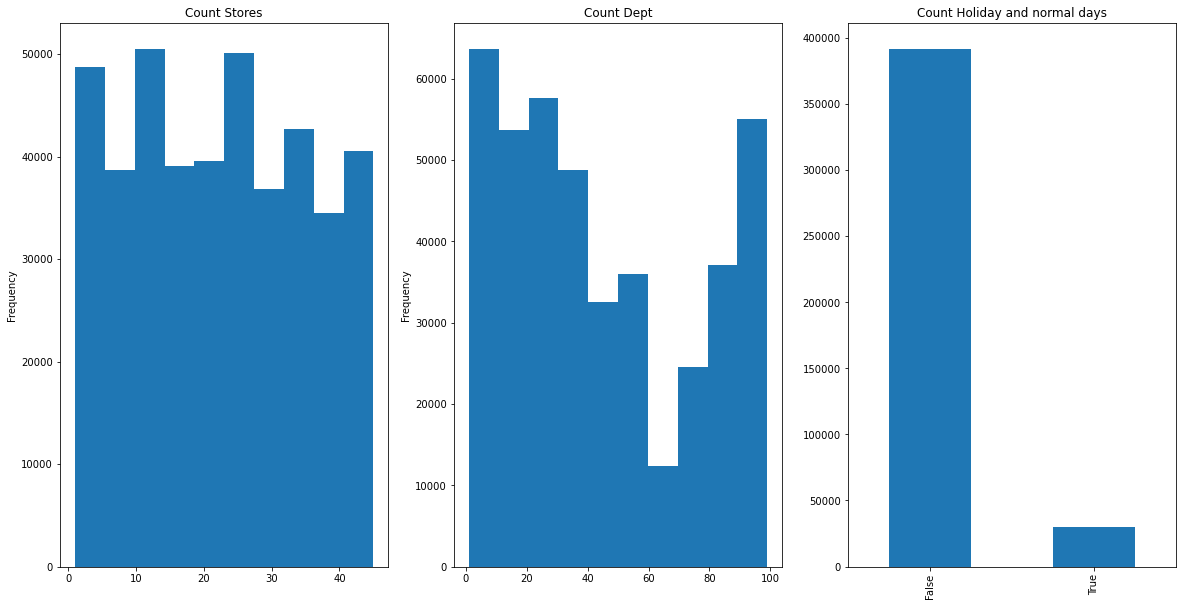

In [12]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20,10))
fig.set_facecolor('white')

df_train_cleaned["Store"].plot.hist(ax=ax1)
ax1.set_title("Count Stores")

df_train_cleaned["Dept"].plot.hist(ax=ax2)
ax2.set_title("Count Dept")

df_train_cleaned["IsHoliday"].value_counts().plot.bar(ax=ax3)

ax3.set_title("Count Holiday and normal days")




In [13]:
df_train_outliers = df_train[df_train["Weekly_Sales"] > 1.5e5]
df_train_outliers["IsHoliday"].value_counts()

False    995
True     152
Name: IsHoliday, dtype: int64

Taking a look at days of high retail, i.e  the outliers, we can see that high reatil has not relationship with high retail. High retail is relationed with some event that makes people consume, but people consuption is not influenced  if a day is holiday or not, for walmart retail whatever.

I don't know if isHoliday is really relevant to predict Walmart Week_Sales, a t-student hyptheses may be used to determine if the p-value relationd to the mean difference is different of zero, but it is out of hand because the classes is totally unbalanced, so it's only possible to test it empiracally, a machine learning model with "IsHoliday variable and other don't. Maybe a continuation of this project we could do it. But for simplification reasons we are going to keep this variable.